# Principal Component Analysis (PCA) Dimensionality Reduction

**Principal Component Analysis** (PCA) is a powerful statistical technique used for dimensionality reduction of high-dimensional data. It helps to simplify complex datasets by transforming them into a smaller set of uncorrelated variables, known as principal components (PCs), while retaining as much of the original information as possible.

PCA has a wide range of applications in various fields such as finance, biology, physics, and engineering. It can be used for data visualization, feature extraction, data compression, and pattern recognition.

In this notebook, we will demonstrate how to use PCA to reduce the dimensions of hyperspectral data.

 The user will be able to:
 1.  upload a CSV file and choose the number of principal components to retain based on a visual display of the percentage of variance explained by each PC.
 2.  To visualize the relationship between the variable they want to predict and the first two principal components.
 3. Get a new CSV file of the new data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
def load_data(csv_path, feature_col_start, feature_col_end, target_col):
    """
    Load a CSV file into a Pandas DataFrame and separate the feature and target columns.

    Parameters:
        csv_path (str): Path to the CSV file to load.
        feature_col_start, feature_col_end, (ints): Range of column indices to use as features.
        target_col (str or int): Name or index of the column to use as target.

    Returns:
        new_df: A df containing the features + labels DataFrame.
    """
    # Load CSV into a Pandas DataFrame
    df = pd.read_csv(csv_path)

    # Extract the feature and target columns
    new_df = df[df.columns[feature_col_start: feature_col_end]]
    new_df[target_col] = df[target_col]

    return new_df

In [25]:
def pca_cumulative_var(df,target_col, standardize=True):
    """
    Perform PCA on the input DataFrame and plot the cumulative
    percentage of explained variance for each principal component.
    
    Args:
    df (pd.DataFrame): DataFrame containing the data to be used for PCA.
    standardize (bool): Whether or not to standardize the data. Default is True.
    target_col (str) = Name oftarget column (label)
    Returns:
    df_trans (pd.DataFrame): Data after perform PCA.
    """
    # Drop Na values
    df = df.dropna()

    # Extract the target column
    target = df[target_col]

    # Remove the target column and any non-numeric columns
    df = df.select_dtypes(include=[np.number])
    df = df.drop(columns=[target_col])

    # Standardize the data if specified
    if standardize:
        df_std = (df - df.mean()) / df.std()
    else:
        df_std = df

    # Fit the PCA model
    pca = PCA().fit(df_std)

    # Assume that pca.transform(df_std) returns a numpy array with shape (n_samples, n_components)
    n_components = pca.n_components_
    pc_col_names = [f"PC_{i+1}" for i in range(n_components)]
    df_pca = pd.DataFrame(data=pca.transform(df_std), columns=pc_col_names)
    
    # Add label column
    df_pca[target_col] = target

    # Calculate the cumulative percentage of explained variance for each component
    cum_var = np.cumsum(pca.explained_variance_ratio_)

    # Plot the cumulative percentage of explained variance for each component
    fig, ax = plt.subplots(1, figsize=(10,7))
    ax.plot(pca.explained_variance_ratio_*100, lw =2,color = "blue")
    ax.plot(pca.explained_variance_ratio_*100,'o',lw = 8,color = "black")
    ax.set_xlabel(" Components",fontsize=20)
    ax.set_ylabel("Explained Variance (%)",fontsize=20)
    ax.set_title("PCA",fontsize=25)

    # Compute cumulative explained variance ratio up to each component
    cumulative_var = np.cumsum(pca.explained_variance_ratio_)

    # Print cumulative explained variance up to first 10 components
    print(f'the cumulative variance explained by the first 10 principal components is {cumulative_var[:10]}')

    return df_pca

In [33]:
def pca_reduce_dim(df_pca, n_components,target_col):
    """
    Reduce the dimensions of the input DataFrame to n_components using PCA.

    Args:
    df_pca (pd.DataFrame): DataFrame containing the data after PCA.
    n_components (int): The number of principal components to retain.

    Returns:
    df_reduced (pd.DataFrame): DataFrame containing the data after dimensionality reduction.
    """

    # Extract the target column
    target = df_pca[target_col]

    df_pc = df_pca[df_pca.columns[:n_components]]

    # Combine the principal components and the target column
    df_reduced = pd.concat([df_pc, target], axis=1)

    return df_reduced

In [52]:
import seaborn as sns

def plot_pca(df, target_col):
    """
    Plot a scatterplot of PC1 vs PC2 with color-coded points based on the target column.
    
    Args:
    - df (pandas DataFrame): DataFrame of PC components after PCA, including the target column
    - target_col (str): Name of the target column in df
    
    Returns:
    - None
    """
    colors = df[target_col] #colors by species

    fig, ax = plt.subplots(1, figsize=(8,6))
    ax = sns.scatterplot(x=df[df.columns[0]], y=df[df.columns[1]],s=30, hue=colors,palette = 'Reds')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(f"PCA by {target_col}",fontsize=22)
    plt.legend(loc=6, bbox_to_anchor=(1.05, 0.5),fontsize=12)

## Example

<ipython-input-3-40233b4e401e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[target_col] = df[target_col]


the cumulative variance explained by the first 10 principal components is [0.6892773  0.93362605 0.96604999 0.98371811 0.99087973 0.99480432
 0.99721178 0.99822246 0.99866985 0.99897454]


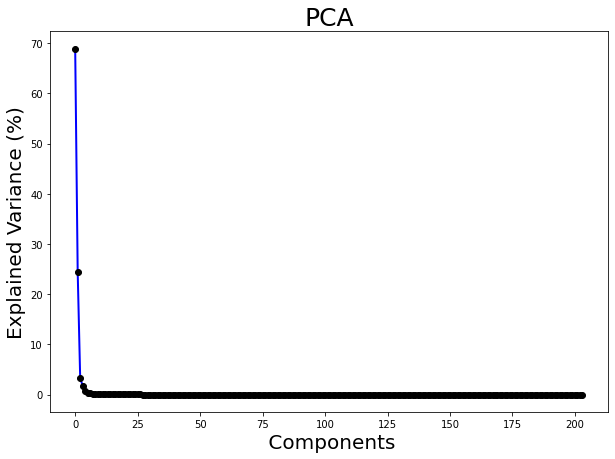

In [26]:
import matplotlib.pyplot as plt

# Define input parameters
csv_path = '/content/data.csv'
feature_idx_i,feature_idx_f = 16,-2
target_col = 'A'

# Load data
data = load_data(csv_path, feature_idx_i,feature_idx_f, target_col)

df_pca = pca_cumulative_var(data,'A')

Reduce the data to the first 4 PC:

In [42]:
df_reduced = pca_reduce_dim(df_pca, 4,target_col)
df_reduced

,PC_1,PC_2,PC_3,PC_4,A
0,4.532820,13.821452,-3.361868,0.187104,2.017270
1,21.681509,7.955221,-0.592862,2.084727,1.872474
2,24.400027,13.666805,-2.749886,2.767386,2.043818
3,-1.812044,-4.616233,1.522555,-0.177865,2.123489
4,3.806426,-3.731468,1.877446,-0.474767,2.122085
...,...,...,...,...,...
610,4.388054,-1.348648,-2.727294,-2.641162,1.344517
611,-21.697121,2.879265,-0.387961,-1.264891,3.690707
612,6.445491,6.986718,2.789373,-1.093855,4.258127
613,-16.323762,-2.380864,-0.959957,0.298176,1.826188


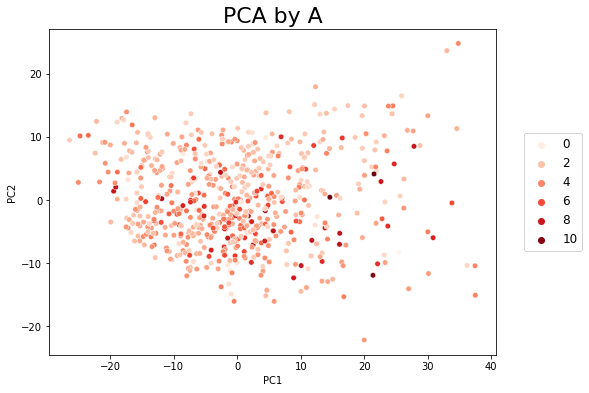

In [53]:
plot_pca(df_reduced,target_col)